In [1]:
!pip install torch pandas numpy matplotlib seaborn wordcloud datasets transformers scikit-learn requests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import requests
import json
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset


In [3]:
# Hugging Face API URL
url = "https://datasets-server.huggingface.co/rows?dataset=abisee%2Fcnn_dailymail&config=1.0.0&split=train&offset=0&length=100"

# Fetch data
response = requests.get(url)
data = response.json()

# Extract rows from response
rows = data["rows"]

# Convert to DataFrame
df = pd.DataFrame([row["row"] for row in rows])

# Display dataset preview
print("Dataset Preview:")
print(df.head())


Dataset Preview:
                                             article  \
0  LONDON, England (Reuters) -- Harry Potter star...   
1  Editor's note: In our Behind the Scenes series...   
2  MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...   
3  WASHINGTON (CNN) -- Doctors removed five small...   
4  (CNN)  -- The National Football League has ind...   

                                          highlights  \
0  Harry Potter star Daniel Radcliffe gets £20M f...   
1  Mentally ill inmates in Miami are housed on th...   
2  NEW: "I thought I was going to die," driver sa...   
3  Five small polyps found during procedure; "non...   
4  NEW: NFL chief, Atlanta Falcons owner critical...   

                                         id  
0  42c027e4ff9730fbb3de84c1af0d2c506e41c3e4  
1  ee8871b15c50d0db17b0179a6d2beab35065f1e9  
2  06352019a19ae31e527f37f7571c6dd7f0c5da37  
3  24521a2abb2e1f5e34e6824e0f9e56904a2b0e88  
4  7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a  


In [4]:
# Drop the 'id' column
df.drop(columns=['id'], inplace=True)

# Verify removal
print("\nUpdated Dataset Columns:", df.columns)



Updated Dataset Columns: Index(['article', 'highlights'], dtype='object')


In [5]:
df.rename(columns={'article': 'input', 'highlights': 'output'}, inplace=True)


In [6]:
def clean_text(text):
    text = text.replace("\n", " ")
    text = " ".join(text.split())  # Remove excessive whitespaces
    return text

df['input'] = df['input'].apply(clean_text)
df['output'] = df['output'].apply(clean_text)

print("\n✅ Data Cleaning Completed!")



✅ Data Cleaning Completed!


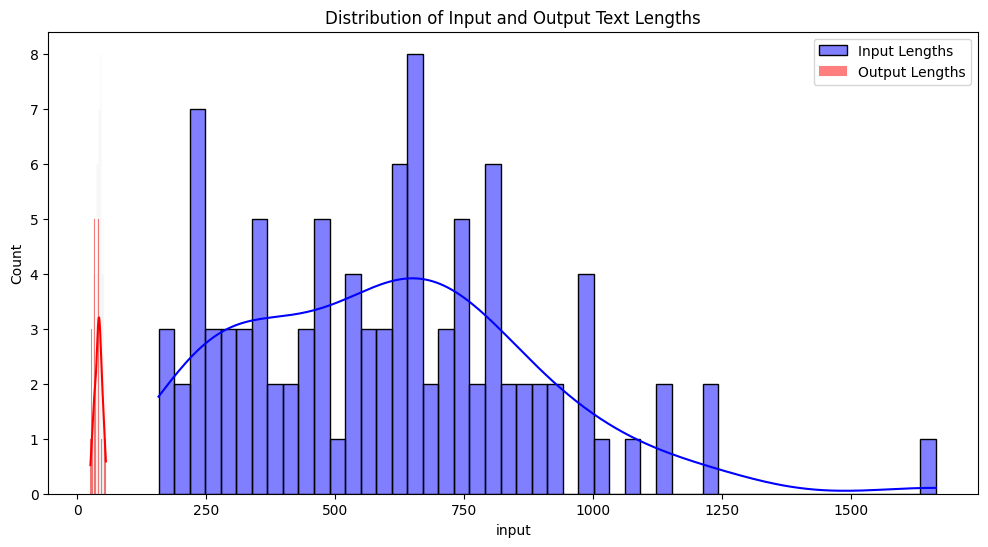

In [7]:
input_lengths = df['input'].apply(lambda x: len(x.split()))
output_lengths = df['output'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,6))
sns.histplot(input_lengths, bins=50, kde=True, color='blue', label='Input Lengths')
sns.histplot(output_lengths, bins=50, kde=True, color='red', label='Output Lengths')
plt.legend()
plt.title('Distribution of Input and Output Text Lengths')
plt.show()


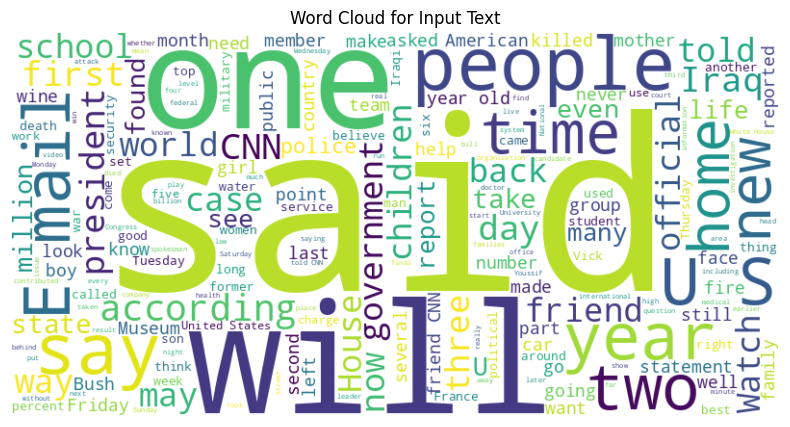

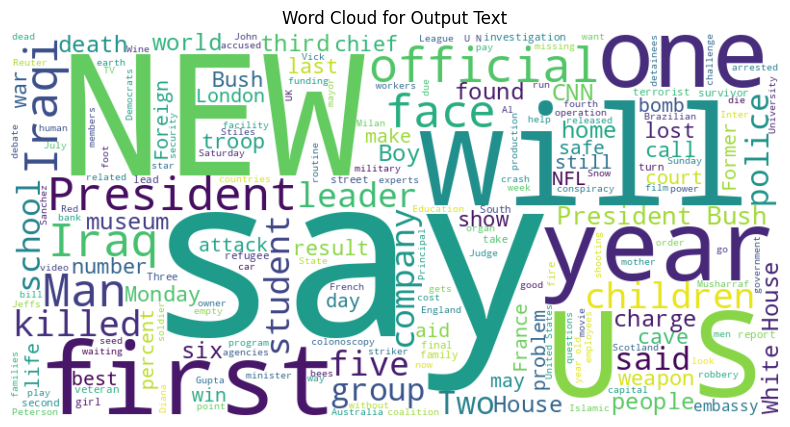

In [8]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(df['input'], 'Word Cloud for Input Text')
plot_wordcloud(df['output'], 'Word Cloud for Output Text')
